# notebook: segmenting nuclei with the cellpose napari plugin

## Overview

Plugins extend the functionality of napari and can be combined together to build workflows. Many plugins exist for common analysis tasks such as segmentation and filtering. In this activity, we will segment nuclei using the [cellpose napari plugin](https://github.com/MouseLand/cellpose-napari). Please visit the [napari hub](https://www.napari-hub.org/) for a listing of the available plugins.

## Data source

The data were downloaded from the [OpticalPooledScreens github repository](https://github.com/feldman4/OpticalPooledScreens).

## Loading the data

We will start by loading an image of DAPI stained nuclei. We can use `scikit-image`'s `imread()` function to download the data from the link below and load it into a numpy array called `nuclei`.

In [1]:
from skimage import io

url = 'https://raw.githubusercontent.com/kevinyamauchi/napari-spot-detection-tutorial/main/data/nuclei_cropped.tif'
nuclei = io.imread(url)

## Viewing the image

As we did in the previous notebooks, we can view the image in napari using the `napari.view_image()` function. Here we set the colormap to `magma`.

In [2]:
import napari

viewer = napari.view_image(nuclei, colormap='magma')

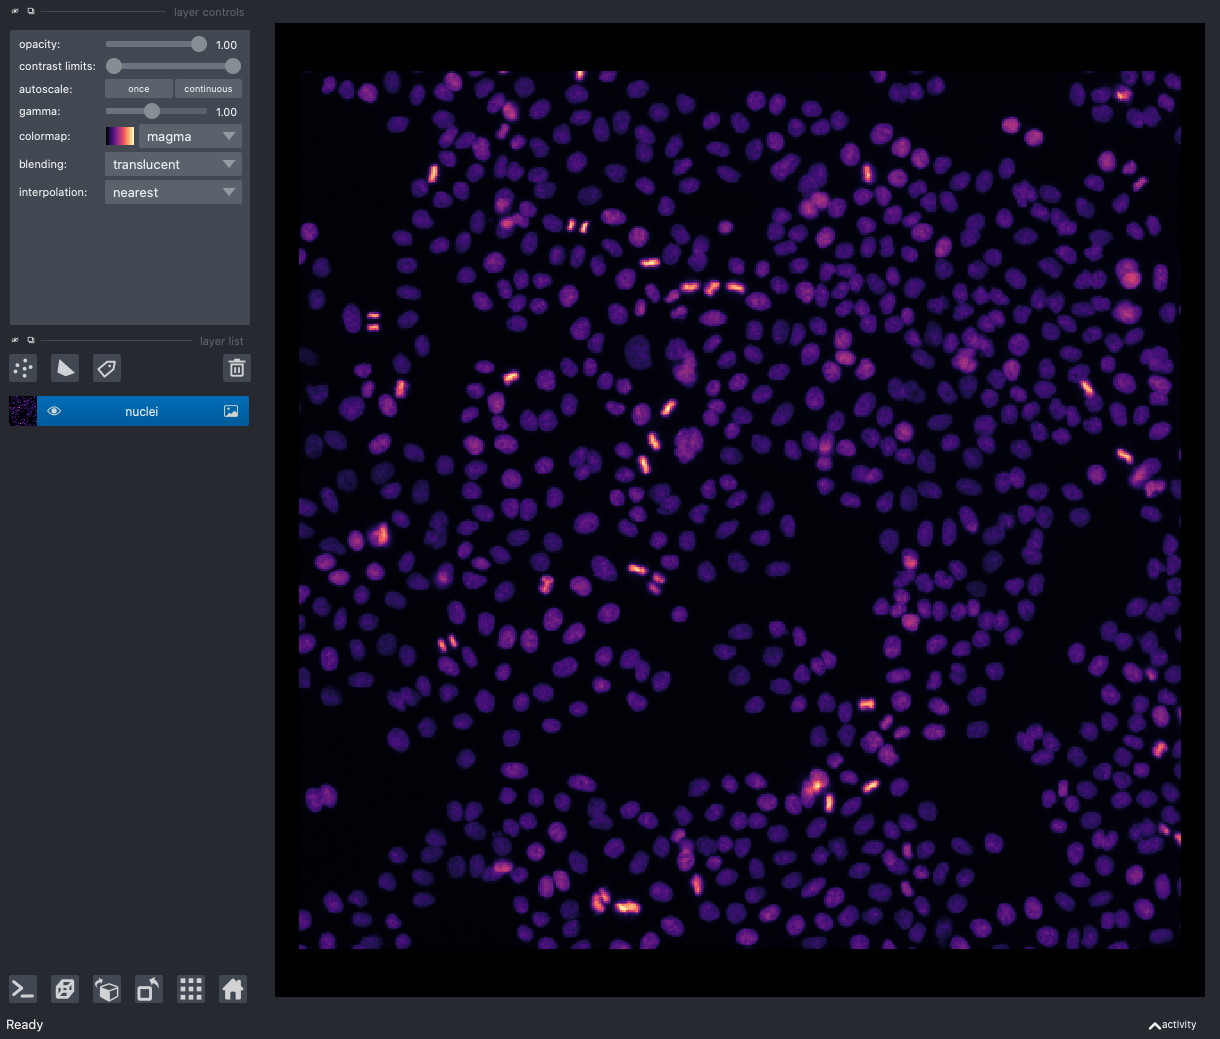

In [3]:
from napari.utils import nbscreenshot

nbscreenshot(viewer)

## Segment nuclei

To segment the nuclei, we will use the [cellpose napari plugin](https://github.com/MouseLand/cellpose-napari). Please perform the segmentation using the instructions below. For more information on cellpose, please see the [paper](https://www.nature.com/articles/s41592-020-01018-x) and [repository](https://github.com/MouseLand/cellpose).

1. Start the cellpose plugin. From the menu bar, click Plugins->cellpose-napari: cellpose. You should see the plugin added to the right side of the viewer.

<img src="https://raw.githubusercontent.com/alisterburt/napari-workshops/main/napari-workshops/notebooks/resources/cellpose_plugin.png" alt="cellpose plugin"  width="80%">


2. Select the "nuclei" image layer.

<img src="https://raw.githubusercontent.com/alisterburt/napari-workshops/main/napari-workshops/notebooks/resources/cellpose_screenshots_image_selection.png" alt="select the image layer"  width="80%">


3. Set the model type to "nuclei"

<img src="https://raw.githubusercontent.com/alisterburt/napari-workshops/main/napari-workshops/notebooks/resources/cellpose_screenshots_model_selection.png" alt="select the nuclei model"  width="80%">


4. We need to give cellpose an estimate of the size of the nuclei so it can properly scale the data. We can do so using a napari Shapes layer. With the Shapes layer, we will outline some nuclei and then cellpose will use those annotations to estimate the size of the nuclei.
    1. Click the "add Shapes" layer button in the viewer. This will create and select a new layer called "Shapes".

    <img src="https://raw.githubusercontent.com/alisterburt/napari-workshops/main/napari-workshops/notebooks/resources/cellpose_screenshots_add_shape.png" alt="add a shapes layer to measure the diameter"  width="80%">

    2. Set the mode to "Ellipse" by clicking the button in the layer controls.
    3. In the canvas, click and drag to add an ellipse that around a "representative" nucleus. For the purpose of this demo, this is enough, but for other data you may need to give more examples to make a better estimate of the cell diameter. If you need to pan/zoom while adding an ellipse, holding the spacebar will allow you to pan/zoom using your mouse (pan via click/drag, zoom by scrolling).
    4. If you would like to edit or move an ellipse, you can switch to "Select shapes" mode in the viewer. Shapes can now be moved by clicking on them and then dragging. They can be resized by selecting them and then dragging the control points.
    
    <img src="https://raw.githubusercontent.com/alisterburt/napari-workshops/main/napari-workshops/notebooks/resources/cellpose_screenshots_select_shape.png" alt="use selection mode to edit shapes"  width="80%">

    5. Once you are happy with your annotations, you can click the "compute diameter from shape layer" button and you will see the "diameter" value populated. For this demo, the value is typically around 10 pixels.
    
    <img src="https://raw.githubusercontent.com/alisterburt/napari-workshops/main/napari-workshops/notebooks/resources/cellpose_screenshots_diameter.png" alt="estimate the cell diameters"  width="80%">


5. For this demo, we recommend de-selecting "average 4 nets"(potentially less accurate, but faster segmentation) and otherwise using the default settings. If you would like to learn more about the cellpose settings, please see the [cellpose plugin documentation](https://cellpose-napari.readthedocs.io/en/latest/settings.html).

    <img src="https://raw.githubusercontent.com/alisterburt/napari-workshops/main/napari-workshops/notebooks/resources/cellpose_screenshots_settings.png" alt="select the segmentation settings"  width="80%">

	
6. Now you are ready to run the segmentation! Click the "run segmentation" button. Segmentation for this demo typically takes ~1.5 minutes. Note that there is not currently a progress bar, so please just be patient.

    <img src="https://raw.githubusercontent.com/alisterburt/napari-workshops/main/napari-workshops/notebooks/resources/cellpose_screenshots_run.png" alt="start the segmentation"  width="80%">


7. When the segmentation is completed, you will see some new layers added to the layer list. Of particular interest is "nuclei_p_masks_000", which contains our segmentation mask added as a Labels layer.

    <img src="https://raw.githubusercontent.com/alisterburt/napari-workshops/main/napari-workshops/notebooks/resources/cellpose_screenshots_results.png" alt="completed segmentation"  width="80%">

## Quantify nuclei shape

In this next section, we will compute and display some basic properties of the segmented cells (e.g., area) using scikit-image and matplotlib.

### Measure area and perimeter

`cellpose` outputs the segmentation masks as a label image in a `Labels` layer called `'nuclei_cp_masks_000'`. In napari, we can access the layer data from the layer object's `data` property. As we did in the previous exercise, we can access the the layer object from the layer list by its name (`viewer.layers['nuclei_cp_masks_000']`). From that layer object, we can access the data.

We can use the scikit-image [`regionprops_table`](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops_table) function to measure the area and perimeter of the detected nuclei. `regionprops_table` outputs a dictionary where each key is a name of a measurement (e.g., `'area'`) and the value is the measurement value for each detected object (nucleus in the case).

In [4]:
from skimage.io import imread

label_im = imread('./data/nuclei_cp_masks_000.png')
viewer.add_labels(label_im, name='nuclei_cp_masks_000')

<Labels layer 'nuclei_cp_masks_000' at 0x7fc6afad34f0>

In [5]:
from skimage.measure import regionprops_table

# measure the area and nucleus for each nucleus
label_layer = viewer.layers['nuclei_cp_masks_000']
rp_table = regionprops_table(
    label_layer.data,
    properties=('area', 'perimeter')
)

median area: 83.0 px


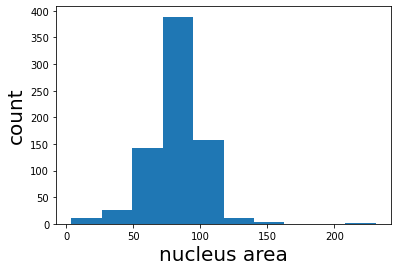

In [6]:
from matplotlib import pyplot as plt
import numpy as np


# print the median area
median_area = np.median(rp_table['area'])
print(f'median area: {median_area} px')

# plot a histogram of the areas
plt.hist(rp_table['area']);
plt.xlabel('nucleus area', fontsize=20);
plt.ylabel('count', fontsize=20);
plt.show();

Finally, we can calculate the circularity from the area and perimeter measurements we made above. The circularity is a shape factor that is 1 when the object is a circle and less than one for shapes that are more "starfish-like"/ The circularity is defined as

$$f_{circ} = \frac{4 \pi A}{P^2}$$

where A is the area and P is the perimeter of the object. We plot the circularity vs. the area and see that the circularity of the nuclei does not appear to depend on the area.

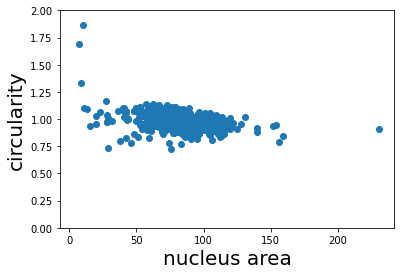

In [7]:
# calculate the circularity of the nuclei
circularity = (4 * np.pi * rp_table['area']) / np.square(rp_table['perimeter'])

# use matplot lib to visualize the relationship between nucleus circularity and area
plt.scatter(rp_table['area'], circularity);
plt.xlabel('nucleus area', fontsize=20);
plt.ylabel('circularity', fontsize=20);
plt.ylim((0, 2))
plt.show()

## Conclusions

In this notebook, we have used the cellpose-napari plugin to perform nucleus segmentation. We then used the results of the segmentation to inspect the relationship between nucleus area and circularity. This demonstration highlights how one can combine napari plugins and python libraries to make measurements on microscopy data.